# Домашнее задание №2

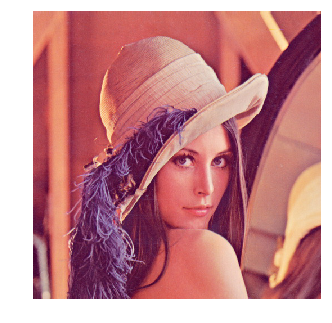

In [1]:
import cv2
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline

def show(img):
    ax = plt.axes([0,0,1,1], frameon=False)
    ax.set_axis_off()
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
def show_gray(img_gray):
    ax = plt.axes([0,0,1,1], frameon=False)
    ax.set_axis_off()
    plt.imshow(img_gray, cmap = 'gray')

img = cv2.imread("lena.jpg")
show(img)

**1. (3 балла)** Реализуйте самостоятельно функцию градационного преобразования вида $T(r)=ar+b$, просто с помощью попиксельного обхода изображения. Примените его к изображению lena.jpg с параметрами $a = 2$, $b = 100$. Примените к исходному изображению векторное преобразование с теми же параметрами. Убедитесь, что получилось одно и то же.                                                            

In [2]:
def to_grad(img, a, b):
    tmp = img.astype(np.uint64)*a+b
    tmp[tmp > 255] = 255
    return tmp.astype(np.uint8)

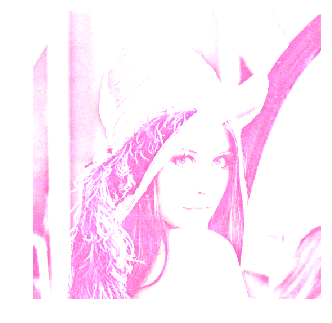

In [3]:
my_img_grad = to_grad(img, 2, 100)
show(my_img_grad)

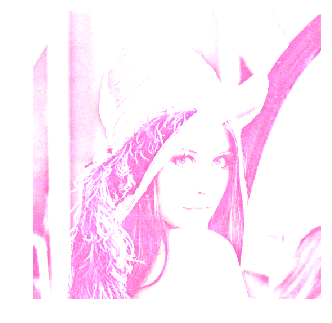

In [4]:
cv_img_grad = cv2.convertScaleAbs(img, alpha=2, beta=100)
show(cv_img_grad)

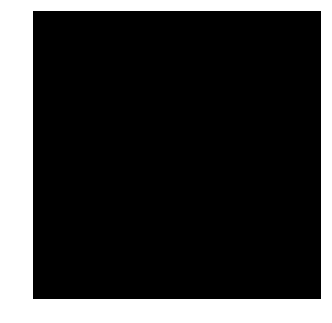

In [5]:
show(my_img_grad - cv_img_grad)

**2. (3 балла)** Загрузите изображение lena.jpg. Усредните значения всех трех цветовых каналов в каждый из каналов итогового изображения.

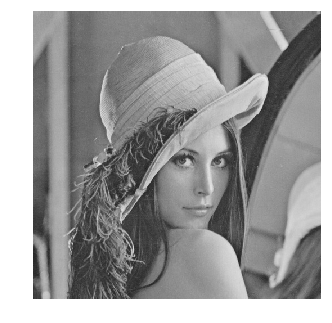

In [6]:
lena_mean = np.zeros((img.shape)).astype(np.uint8)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        lena_mean[i][j] = int(np.mean(img[i][j]))
show(lena_mean)

**3. (3 балла)** Загрузите изображение $lena.jpg$. Переведите изображение в градации серого. Примените к серому изображению операцию линейного растяжения диапазона яркостей ($normalize$) и эквализации гистограммы ($equalizeHist$). Постройте разность полученных результатов. Состыкуйте в одно изображение в градациях серого результат линейного растяжения, эквализации и их разности.

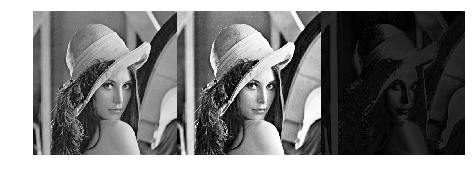

In [7]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray_norm = np.zeros((img_gray.shape))
img_gray_norm = cv2.normalize(img_gray, dst=img_gray_norm, alpha = 0, beta = 255,  norm_type=cv2.NORM_MINMAX)
img_gray_norm_eh = cv2.equalizeHist(img_gray_norm)
diff = cv2.absdiff(img_gray_norm, img_gray_norm_eh)
show_gray(np.hstack((img_gray_norm, img_gray_norm_eh, diff)))

**4. (3 балла) ** Реализуйте функцию добавления шума «соль и перец» для одноканального изображения. Входные параметры: $src$ – исходная одноканальная матрица $Mat$, $p$ – вероятность замещения исходных значений на $0$, $q$ – вероятность замещения исходных значений на $255$. Загрузите изображение $lena.jpg$, выделите каналы изображения в отдельные матрицы ($split$), добавьте шум «соль и перец» в каждый канал при помощи реализованной Вами функции с параметрами

1. $p=q=0.05$
2. $p=q=0.1$
3. $p=q=0.15$

In [8]:
def salt_pepper(src, p, q):
    for i in range(src.shape[0]):
        for j in range(src.shape[1]):
            rand_val = np.random.rand()
            if np.random.rand() <= p:
                src[i][j] = 0
            if np.random.rand() <= q:
                src[i][j] = 255
    return src

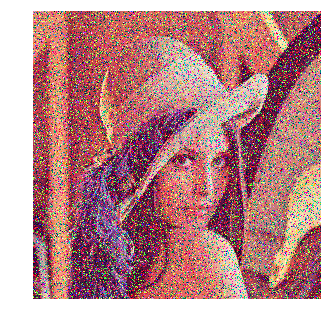

In [9]:
B, G, R = cv2.split(img)
B_sp, G_sp, R_sp  = salt_pepper(B, 0.05, 0.05), salt_pepper(G, 0.1, 0.1), salt_pepper(R, 0.15, 0.15)
show(cv2.merge((B_sp, G_sp, R_sp)))

**5. (6 баллов)** Загрузите изображение $lena.jpg$ (512х512). Переведите изображение в градации серого. Произведите фильтрацию данного изображения в частотной области идеальным фильтром низких частот (фильтр, обрезающий все высокочастотные составляющие Фурье-образа, находящиеся на большем расстоянии от начала координат, чем некоторое заданное расстояние $D$), идеальным фильтром высоких частот (фильтр, обрезающий все низкокочастотные составляющие Фурье-образа, находящиеся на меньшем расстоянии от начала координат, чем некоторое заданное расстояние $D$) со следующими значениями радиуса фильтров:
1. 5
2. 15
3. 30
4. 255

Для каждого фильтра постройте состыкованное изображение из следующих: исходное изображение в градациях серого, изображение Фурье-спектра (после логарифмической коррекции для лучшей визуализации), изображение Фурье-спектра после фильтрации, изображение в пространственной области после фильтрации. На выходе должно получиться 8 изображений (4 параметра фильтров х 2 типа фильтров). Функции, которые Вам потребуются: $dft$, $mulSpectrums$, $idft$.

In [10]:
def ideal_filter(img_gray, D, is_low=False):
    dft = cv2.dft(np.float32(img_gray), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)

    magnitude_spectrum = 10 * np.log(np.abs(cv2.mulSpectrums(dft_shift[:, :, 0], dft_shift[:, :, 1], flags=cv2.DFT_ROWS)) + 1)
    
    w, h = img_gray.shape
    fshift = dft_shift.copy()
    if is_low:
        for i in range(w):
            for j in range(h):
                if (i - w / 2) ** 2 + (j - h / 2) ** 2 > D ** 2:
                    fshift[i, j] = 0
    else:
        for i in range(w):
            for j in range(h):
                if (i - w / 2) ** 2 + (j - h / 2) ** 2 < D ** 2:
                    fshift[i, j] = 0

    magnitude_spectrum_with_mask = 10 * np.log(np.abs(cv2.mulSpectrums(fshift[:, :, 0], fshift[:, :, 1], flags=cv2.DFT_ROWS)) + 1)
    
    f_ishift = np.fft.ifftshift(fshift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])
    img_back = 255 * img_back / img_back.max()
    show_gray(np.hstack((img_gray, magnitude_spectrum, magnitude_spectrum_with_mask, img_back)))

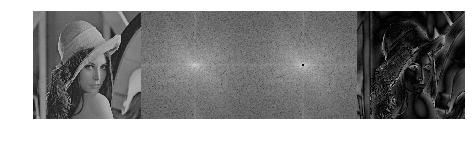

In [11]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ideal_filter(img_gray, 5) 

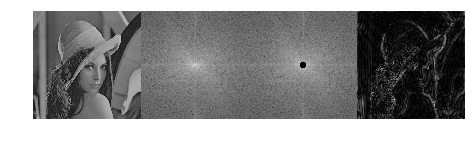

In [12]:
ideal_filter(img_gray, 15)

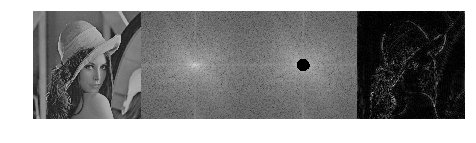

In [13]:
ideal_filter(img_gray, 30)

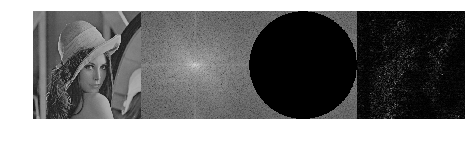

In [14]:
ideal_filter(img_gray, 255)

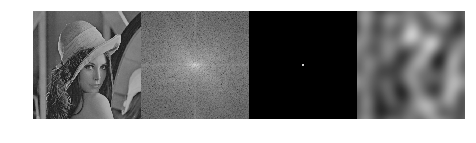

In [15]:
ideal_filter(img_gray, 5, is_low=True)

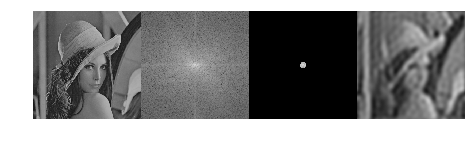

In [16]:
ideal_filter(img_gray, 15, is_low=True)

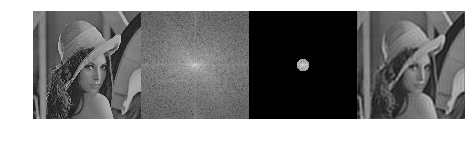

In [17]:
ideal_filter(img_gray, 30, is_low=True)

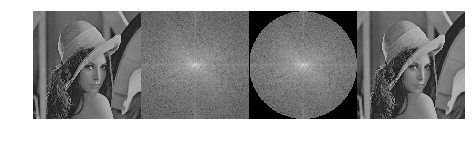

In [18]:
ideal_filter(img_gray, 255, is_low=True)

**6. (5 баллов) **Удалите диагональные полоски с изображения $lena\_diagonal.jpg$. Вычислите среднеквадратичную ошибку (mean squared error, $MSE$, \url{http://en.wikipedia.org/wiki/Mean_squared_error}) для полученного результата и изображения $lena\_gray\_512.tif$. Задача будет засчитана при $MSE < 1500$. Тот, у кого по результатам проверки будет наименьшее значение MSE среди всех студентов для этой задачи, получит призовую шоколадку (раньше мы раздавали призовые баллы, но теперь у нас концепция фиксированного максимального количества баллов)

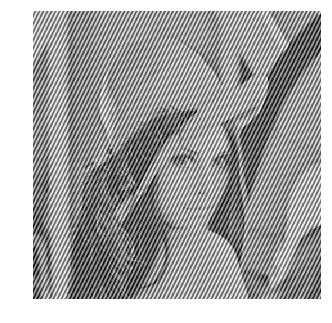

In [19]:
img = cv2.imread("lena_diagonal.jpg")
img_gray_512 = cv2.imread("lena_gray_512.tif")
show(img)

In [20]:
def MSE(img1, img2):
    mse_err = np.sum((img1.astype("float") - img2.astype("float")) ** 2) / np.prod(img1.shape)
    return mse_err

MSE = 945.91865921


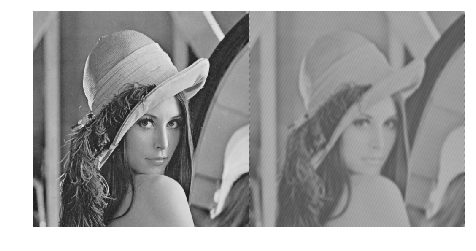

In [22]:
gb = cv2.GaussianBlur(img, (7, 9), 4)
print('MSE =', MSE(gb, img_gray_512))
show(np.hstack((img_gray_512, gb)))

**7. (5 баллов)** Подавите шум на изображении $lena\_color\_512\_noise.tif$. Вычислите среднеквадратичную ошибку ($MSE$) для полученного результата и изображения $lena\_color\_512.tif$. Задача будет засчитана при $MSE < 150$. Тот, у кого по результатам проверки будет наименьшее значение $MSE$ среди всех студентов для этой задачи, получит призовую шоколадку.

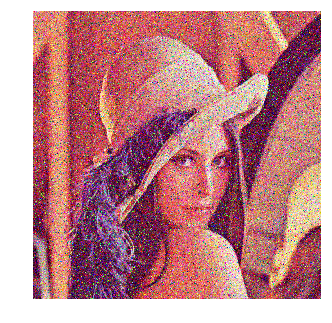

In [23]:
img = cv2.imread("lena_color_512-noise.tif")
img_color_512 = cv2.imread("lena_color_512.tif") 
show(img)

MSE = 134.936946869


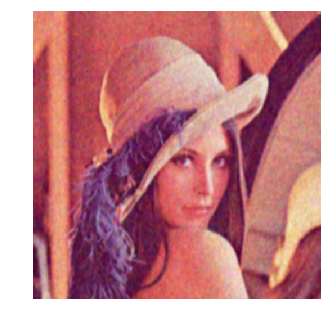

In [24]:
median_blur = cv2.medianBlur(img, 3)
g_blur = cv2.GaussianBlur(median_blur, (5, 13), 2)
print('MSE =', MSE(g_blur, img_color_512))
show(g_blur)

**8. (5 баллов)** Реализуйте функцию пространственной фильтрации изображения однородным усредняющим фильтром размера $n \times n$ (все коэффициенты маски равны $\frac{1}{n^2}$). При вычислении среднего используйте тот факт, что при переходе от точки к точке обновляется только часть элементов изображения под маской. Примените реализованный фильтр к предварительно переведенному в градации серого изображению $lena.jpg$ при $n = 3$ и $n = 5$. Постройте и сохраните изображение, представляющее собой разность полученных результатов фильтрации.

In [25]:
img = cv2.imread("lena.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [26]:
def get_tmp(img_gray, n):
    w, h = img_gray.shape
    tmp = np.zeros((w + n//2*2, h + n//2*2))
    hn = n // 2
    tmp[hn : w + hn, hn : h + hn] = img_gray
    tmp[: hn, hn : h + hn] = img_gray[0]
    tmp[w+hn:, hn : h + hn] = img_gray[-1]
    tmp[:hn, :hn] = img_gray[0][0]
    tmp[:hn, h+hn:] = img_gray[0][-1]
    tmp[w+hn:, :hn] = img_gray[-1][0]
    tmp[w+hn:, h+hn:] = img_gray[-1][-1]
    for i in range(w):
        tmp[i+hn, : hn] = img_gray[i][0]
        tmp[i+hn, h+hn:] = img_gray[i][-1]
    return tmp

def avg_filter(img_gray, n):
    w, h = img_gray.shape
    tmp = get_tmp(img_gray, n)
    filtered = np.zeros(img_gray.shape)
    tmp_sum = 0
    for i in range(w):
        for j in range(h):
            if j == 0:
                tmp_sum = tmp[i : i + n, j : j + n].sum()
            else:
                tmp_sum = tmp_sum + tmp[i : i + n, j + n - 1].sum() - tmp[i : i + n, j - 1].sum()
            filtered[i][j] = tmp_sum
    filtered = filtered / n**2
    return filtered       

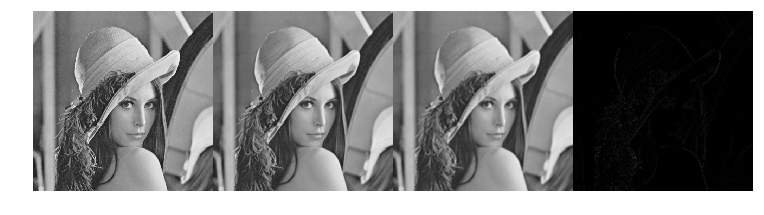

In [27]:
filtered_3 = avg_filter(img_gray, 3)
filtered_5 = avg_filter(img_gray, 5)
diff = cv2.absdiff(filtered_3, filtered_5)
plt.figure(figsize=(10, 10))
show_gray(np.hstack((img_gray, filtered_3, filtered_5, diff)))